In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
import os
import pandas as pd
import seaborn as sns
import PIL
import matplotlib.pyplot as plt
from matplotlib.image import imread





In [9]:
# Load VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


416
Number of uninfected cells 196
Number of infected cells 220


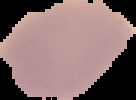

In [22]:
import pathlib
path = "cell_images/"
data_dir = pathlib.Path(path).with_suffix('')

image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

uninfected = list(data_dir.glob("Uninfected/*"))
parasitized = list(data_dir.glob("Parasitized/*"))
print("Number of uninfected cells", len(uninfected))
print("Number of infected cells", len(parasitized))

PIL.Image.open(uninfected[1])


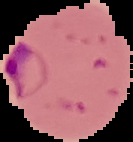

In [23]:
PIL.Image.open(parasitized[1])

In [67]:
dim1 = []
dim2 = []
uninfected_path='cell_images/Uninfected/'
for image_filename in os.listdir(uninfected_path):
    
    if not image_filename.endswith(('jpg', 'jpeg', 'png', 'gif')):
                         continue
                      
    img = imread(uninfected_path+image_filename)
    
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

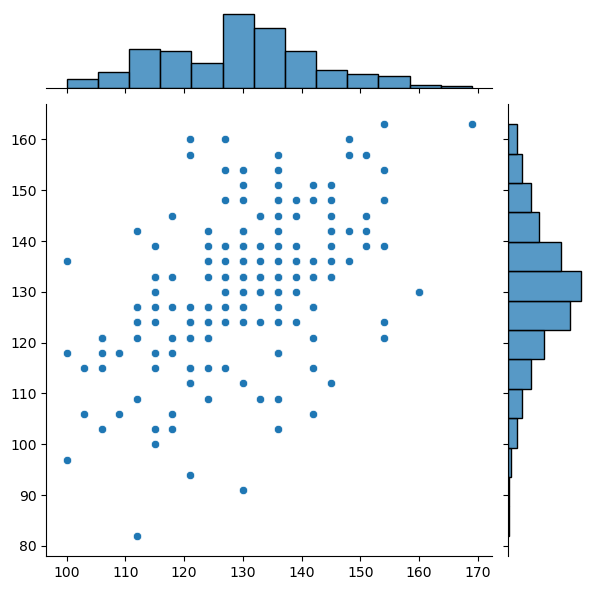

In [64]:
sns.jointplot(x=dim1, y=dim2, kind="scatter")
plt.show()

In [28]:
# mean of dimension of uninfected images
np.mean(dim1), np.mean(dim2)

(129.5408163265306, 130.3826530612245)

In [32]:
dim1 = []
dim2 = []
Infected_path='cell_images/Parasitized/'
for image_filename in os.listdir(Infected_path):
    
    if not image_filename.endswith(('jpg', 'jpeg', 'png', 'gif')):
                         continue
                      
    img = imread(Infected_path+image_filename)
    
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

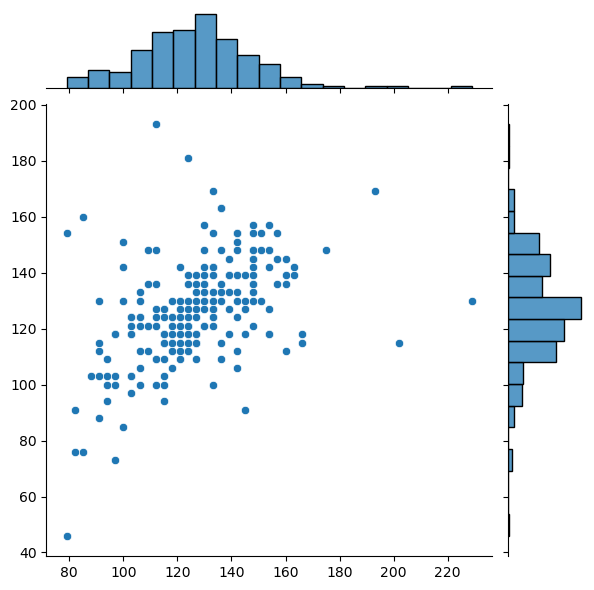

In [33]:
sns.jointplot(x=dim1, y=dim2, kind="scatter")
plt.show()

In [47]:
np.mean(dim1), np.mean(dim2)

(129.5408163265306, 130.3826530612245)

In [48]:
image_shape = (130,130,3)

In [49]:
from PIL import Image

image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # randomly shift the pic width by a max of 5%
                               height_shift_range=0.10, # randonly shift the pic height by a max of 5%
                               # rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest', # Fill in missing pixels with the nearest filled value
                               validation_split = 0.3,
                              )

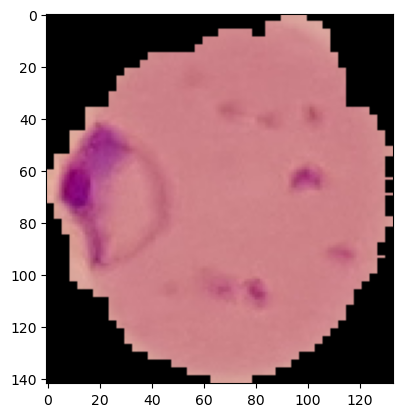

In [50]:
para_img = imread(parasitized[1])
plt.imshow(para_img)

In [ ]:
para_img = imread(parasitized[1])
plt.imshow(para_img)

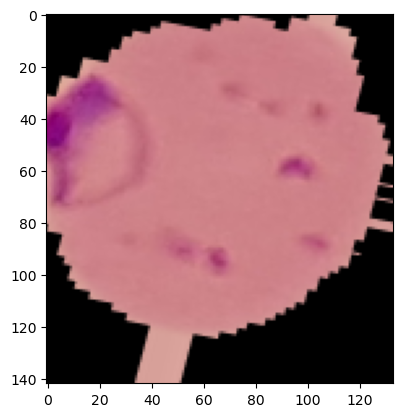

In [51]:
plt.imshow(image_gen.random_transform(para_img))

In [10]:
# Create a new model
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

In [11]:
model = Model(inputs=base_model.input, outputs=x)

In [12]:

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
from tensorflow.keras.utils import to_categorical

In [13]:
# Data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    'cell_images',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    'cell_images',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 333 images belonging to 2 classes.
Found 83 images belonging to 2 classes.


In [7]:
# Train the model
model.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10


c:\Users\sam\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 123s 11s/step - accuracy: 0.4806 - loss: 1.0605 - val_accuracy: 0.5301 - val_loss: 0.7024
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 122s 11s/step - accuracy: 0.4463 - loss: 0.7090 - val_accuracy: 0.5301 - val_loss: 0.6910
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 125s 11s/step - accuracy: 0.5556 - loss: 0.6947 - val_accuracy: 0.4699 - val_loss: 0.6936
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 124s 11s/step - accuracy: 0.5074 - loss: 0.6934 - val_accuracy: 0.5301 - val_loss: 0.6918
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 129s 12s/step - accuracy: 0.5477 - loss: 0.6909 - val_accuracy: 0.5301 - val_loss: 0.6918
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 131s 12s/step - accuracy: 0.5194 - loss: 0.6922 - val_accuracy: 0.5301 - val_loss: 0.6912
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 125s 11s/step - accuracy: 0.5597 - loss: 0.6813 - val_accuracy: 0.4699 - val_loss: 0.7028
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 122s 12s/step - accuracy: 0.5271 - loss: 0.6895 - val_accuracy: 0.4819 - val_

In [ ]:
# Save the model
model.save('model/malaria_detection_model.h5')